In [5]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tools.clusterfit as cf
import seaborn as sns
plt.style.use('nice.mplstyle')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
data = pd.read_csv('../data/samples_in_lightcone0_with_trees_duplicate_excision.csv')
# data = pd.read_csv('../data/samples_in_lightcone0.csv')
frac = pd.read_csv('../data/jay_id_core_fraction(1).csv')
obs  = pd.read_csv('../data/obs-concentration.csv')

In [20]:
len(data), len(frac)

(711, 771)

In [21]:
frac['snap_num'] = frac['snap_num'].astype(int)
frac['SOAPID'] = frac['SOAPID'].astype(int)
data = data.merge(frac, on=['SOAPID', 'snap_num']) # this should match both SOAPID and snap_num. 
# but it doesnt for now. Wait for Joey. If it's only a misalignment then it's fine.
len(data), len(frac)

(711, 771)

/data1/yujiehe/conda-env/halo/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data1/yujiehe/conda-env/halo/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data1/yujiehe/conda-env/halo/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data1/yujiehe/conda-env/halo/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

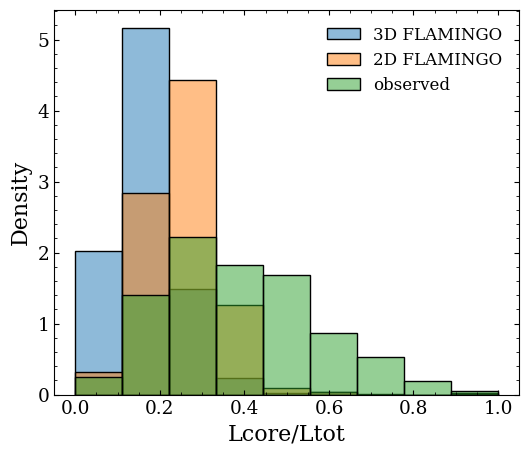

In [22]:
fig, ax = plt.subplots(1,1,figsize=(6,5))
bins = np.linspace(0, 1, 10)
sns.histplot(data['Lcore/Ltot'], bins=bins, stat='density', alpha=0.5, label='3D FLAMINGO')
sns.histplot(data['2DLcore/Ltot'], bins=bins, stat='density', alpha=0.5, label='2D FLAMINGO')
sns.histplot(obs['Fraction'], bins=bins, stat='density', alpha=0.5, label='observed')
plt.legend()
plt.show()